# Import Packages

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from datetime import datetime, timedelta

# Reading & Loading Data

In [174]:
data=pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')

C:\Users\h226754\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [175]:
data.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/28/2019,0:00,BROOKLYN,11208,40.685050,-73.875950,"(40.68505, -73.87595)",NaN,NaN,126 CHESTNUT STREET,...,Passing Too Closely,NaN,NaN,NaN,4122662,Sedan,NaN,NaN,NaN,NaN
1,04/28/2019,0:00,QUEENS,11419,40.690490,-73.816086,"(40.69049, -73.816086)",103 AVENUE,130 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4121710,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,04/28/2019,0:00,NaN,NaN,40.699955,-73.986820,"(40.699955, -73.98682)",JAY STREET,SANDS STREET,NaN,...,Unspecified,NaN,NaN,NaN,4122602,Sedan,Bike,NaN,NaN,NaN
3,04/28/2019,0:01,QUEENS,11369,40.760900,-73.870180,"(40.7609, -73.87018)",99 STREET,31 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4123523,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,04/28/2019,0:05,BROOKLYN,11233,40.676884,-73.919230,"(40.676884, -73.91923)",HOWARD AVENUE,ATLANTIC AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,4122095,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN


In [176]:
data.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

# Answers to Section 1 Questions

# Section 1: Question 1

In [177]:
found = data[data['DATE'].str.contains('2019')]
TNOPI_Dec_2018=data['NUMBER OF PERSONS INJURED'].sum()-found['NUMBER OF PERSONS INJURED'].sum()
print(TNOPI_Dec_2018)

368034.0


# Section 1: Question 2

In [178]:
data_2016 = data[data['DATE'].str.contains('2016')]
data_2016_non_nan=data_2016.dropna(subset=['BOROUGH'])
Total_collisions_2016=data_2016_non_nan['BOROUGH'].count()
found_Brooklyn=data_2016_non_nan[data_2016_non_nan['BOROUGH'].str.contains('BROOKLYN')]
All_Brooklyn=found_Brooklyn['BOROUGH'].count()
proportion_Brooklyn=(All_Brooklyn/Total_collisions_2016)
print(proportion_Brooklyn)

0.30961778079314234


# Section 1: Question 3 

In [179]:
#data_2016_non_nan[['NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'DATE']]

In [180]:
NOI=data_2016['NUMBER OF CYCLIST INJURED'].astype(bool).sum(axis=0)
NOK=data_2016['NUMBER OF CYCLIST KILLED'].astype(bool).sum(axis=0)
INJURED_OR_KILLED=(NOI+NOK)/(len(data_2016))
print(INJURED_OR_KILLED)

0.021654742632339373


# Section 1: Question 4 

In [181]:
pops = {'BOROUGH': ['The Bronx', 'Brooklyn','Manhattan','Queens','Staten Island'], 'Population': [1471160, 2648771 ,1664727,2358582,479458]} 
df = pd.DataFrame(data=pops )
print(df)

data_2017=data[data['DATE'].str.contains('2017')]
mod_data_2017=data_2017[['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']]
mod_data_2017_non_nan=mod_data_2017.dropna(subset=['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5'])
inds_1=[mod_data_2017_non_nan['CONTRIBUTING FACTOR VEHICLE 1'].str.contains("Alcohol")]
inds_2=[mod_data_2017_non_nan['CONTRIBUTING FACTOR VEHICLE 2'].str.contains("Alcohol")]
inds_3=[mod_data_2017_non_nan['CONTRIBUTING FACTOR VEHICLE 3'].str.contains("Alcohol")]
inds_4=[mod_data_2017_non_nan['CONTRIBUTING FACTOR VEHICLE 4'].str.contains("Alcohol")]
inds_5=[mod_data_2017_non_nan['CONTRIBUTING FACTOR VEHICLE 5'].str.contains("Alcohol")]
alcoholic_inds=inds_1 or inds_2

mod_data_2017_non_nan['alcoholic_inds']=ttt
mod_data_2017_non_nan2=mod_data_2017_non_nan[mod_data_2017_non_nan['alcoholic_inds']==True]
grouped=mod_data_2017_non_nan2[mod_data_2017_non_nan2['alcoholic_inds']].groupby('BOROUGH').count()
df['Alcoholic_accidents']=np.array(grouped['alcoholic_inds'])
max_ratio=((df['Alcoholic_accidents']/df['Population']).max())

print(max_ratio)
max_borough=((df['Alcoholic_accidents']/df['Population'])==max_ratio)
df['BOROUGH'][max_borough]


         BOROUGH  Population
0      The Bronx     1471160
1       Brooklyn     2648771
2      Manhattan     1664727
3         Queens     2358582
4  Staten Island      479458
1.1447556201141194e-05


C:\Users\h226754\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


3    Queens
Name: BOROUGH, dtype: object

In [182]:
#ttt=np.array(alcoholic_inds)[0]

In [183]:
mod_data_2017_non_nan['alcoholic_inds']=ttt

C:\Users\h226754\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Section 1: Question 5

In [184]:
data_2016=data_2016.dropna(subset=['ZIP CODE'])
Cars_1=data_2016.groupby(['ZIP CODE'])['VEHICLE TYPE CODE 1'].count()
Cars_2=data_2016.groupby(['ZIP CODE'])['VEHICLE TYPE CODE 2'].count()
Cars_3=data_2016.groupby(['ZIP CODE'])['VEHICLE TYPE CODE 3'].count()
Cars_4=data_2016.groupby(['ZIP CODE'])['VEHICLE TYPE CODE 4'].count()
Cars_5=data_2016.groupby(['ZIP CODE'])['VEHICLE TYPE CODE 5'].count()

Cars=(Cars_1+Cars_2+Cars_3+Cars_4+Cars_5)
max_value = max(Cars)
print(max_value)


5703


# Section 1: Question 6

In [185]:
data_2013 = data[data['DATE'].str.contains('2013')]
data_2014 = data[data['DATE'].str.contains('2014')]
data_2015 = data[data['DATE'].str.contains('2015')]
data_2016 = data[data['DATE'].str.contains('2016')]
data_2017 = data[data['DATE'].str.contains('2017')]
data_2018 = data[data['DATE'].str.contains('2018')]

In [186]:
#len(data_2013), len(data_2014),len(data_2015),len(data_2016),len(data_2017),len(data_2018)

intercept: [-12775821.07619048]
slope: [[6447.91428571]]
6447.914285714286


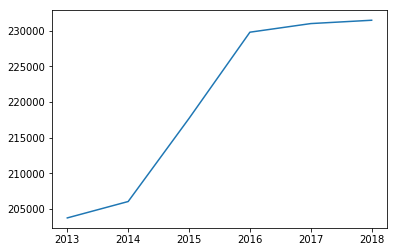

In [187]:
from sklearn.linear_model import LinearRegression
y = np.array([len(data_2013), len(data_2014),len(data_2015),len(data_2016),len(data_2017),len(data_2018)])
x = np.array([2013,2014,2015,2016,2017,2018])
model = LinearRegression()
x=x.reshape(-1, 1)
y=y.reshape(-1, 1)
model.fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
plt.plot(x,y)
print(float(model.coef_))